<a href="https://colab.research.google.com/github/achalweise/Project-2/blob/main/Project_2_Part_5_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


## Data Clean Up

In [ ]:
house_prices = pd.read_csv('/content/HousePrices_HalfMil.csv')
house_prices.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [ ]:
#Checking for duplicates
house_prices.duplicated().sum()
house_prices.drop_duplicates(inplace = True)

In [ ]:
#identifying missing data 
house_prices.isna().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [ ]:
#house_prices = house_prices.fillna(house_prices['Prices'].mean())

In [ ]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494307 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           494307 non-null  int64
 1   Garage         494307 non-null  int64
 2   FirePlace      494307 non-null  int64
 3   Baths          494307 non-null  int64
 4   White Marble   494307 non-null  int64
 5   Black Marble   494307 non-null  int64
 6   Indian Marble  494307 non-null  int64
 7   Floors         494307 non-null  int64
 8   City           494307 non-null  int64
 9   Solar          494307 non-null  int64
 10  Electric       494307 non-null  int64
 11  Fiber          494307 non-null  int64
 12  Glass Doors    494307 non-null  int64
 13  Swiming Pool   494307 non-null  int64
 14  Garden         494307 non-null  int64
 15  Prices         494307 non-null  int64
dtypes: int64(16)
memory usage: 64.1 MB


In [ ]:
#identifying inconsistencies 
house_prices.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.0000,494307.000000,494307.000000,494307.000000,494307.000000
mean,124.924472,2.001297,2.003221,2.998094,0.332965,0.332688,0.334347,0.499329,2.000939,0.498668,0.500519,0.5003,0.500001,0.500381,0.501628,42047.118137
std,71.799761,0.816986,1.413961,1.414055,0.471275,0.471176,0.471762,0.500000,0.816249,0.499999,0.500000,0.5000,0.500001,0.500000,0.499998,12108.362576
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.0000,1.000000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,77975.000000


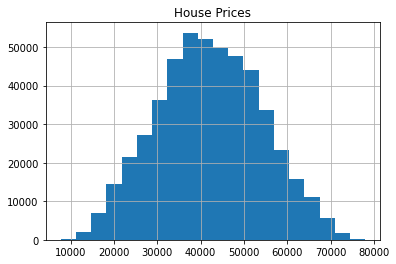

In [ ]:
#producing a univariate visual
house_prices['Prices'].hist(bins=20)
plt.title('House Prices')
plt.show()

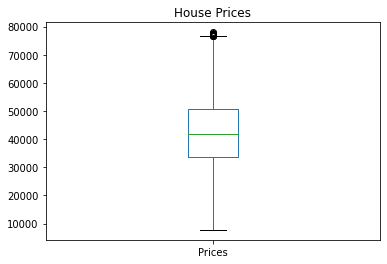

In [ ]:
#identify Outliers
house_prices.boxplot(column = 'Prices', grid = False)
plt.title('House Prices')
plt.show()

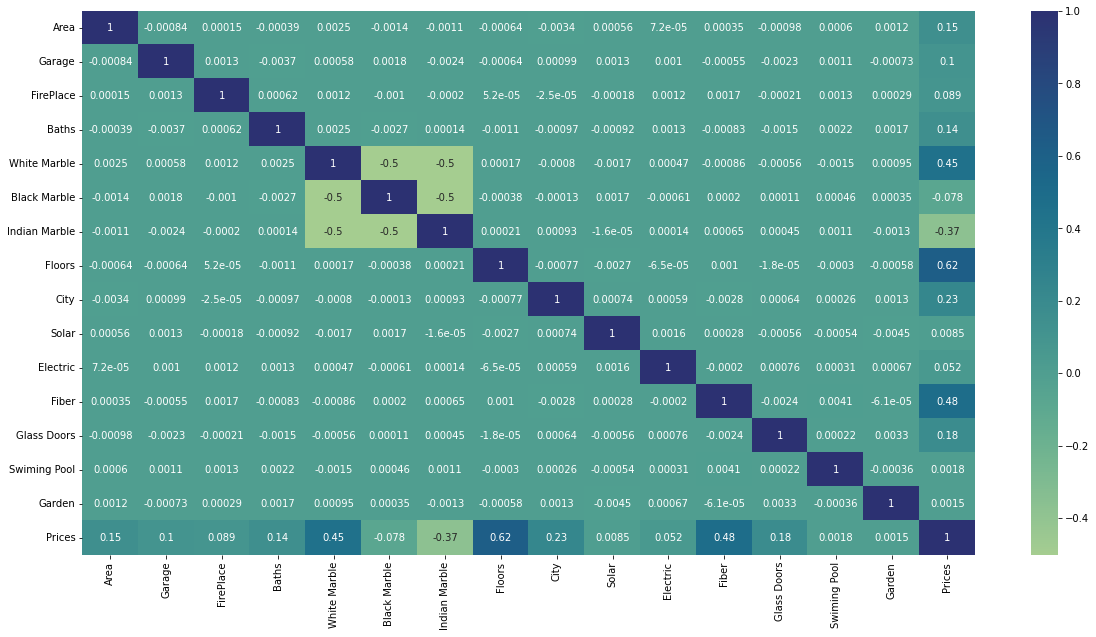

In [ ]:
#Create a correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(house_prices.corr(), annot=True, ax=ax, cmap="crest");

In [ ]:
X = house_prices.drop(columns = 'Prices')
y = house_prices['Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Scale 
scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# LR model 
# Instantiate 
lr = LinearRegression()

# Make the pipeline
lr_pipe = make_pipeline(scaler, lr)

# Fit LR model 
lr_pipe.fit(X_train, y_train)

# create training and testing predictions 
train_preds = lr_pipe.predict(X_train)
test_preds = lr_pipe.predict(X_test)

# Evaluation metrics on both the train and test sets. 
print('Linear Regression Training RMSE:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('Linear Regression Testing RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('------')
print('Linear Regression Training R2:', r2_score(y_train, train_preds))
print('Linear Regression Testing R2:', r2_score(y_test, test_preds))

Linear Regression Training RMSE: 5.1202645420039675e-11
Linear Regression Testing RMSE: 5.118803517768675e-11
------
Linear Regression Training R2: 1.0
Linear Regression Testing R2: 1.0


In [ ]:
lr_train_predict = lr.predict(x_train_scaled)
print(lr_train_predict)

lr_test_predict = lr.predict(x_test_scaled)
print(lr_test_predict)

[36350. 48050. 64050. ... 26975. 45600. 40350.]
[34284.68948474 49953.38408435 45934.83482305 ... 47831.18644219
 35483.72065677 46250.12353057]


In [ ]:
#round predictions to 2 decimals 
lr_train_predict = lr_train_predict.round(decimals = 2)
lr_test_predict = lr_test_predict.round(decimals = 2)

In [ ]:
from pandas._libs import index
#creating select highly correlated features, for visual presentation,  
X_train['Prices'] = lr_train_predict
X_train['Prices']
solution_top_knn_train = X_train[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors' ]]
solution_low_knn_train = X_train[['Indian Marble','Black Marble','Swiming Pool', 'Solar', 'Prices']]

#creating select highly correlated features, for visual presentation showing test data set.  
X_test['Prices'] = lr_test_predict
X_test['Prices'] 
solution_top_knn_test = X_train[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors' ]]
solution_low_knn_test = X_train[['Indian Marble','Black Marble','Swiming Pool', 'Prices' ]]

In [ ]:
# KNN model 
# Instantiate 
knn = KNeighborsRegressor()

# Make the pipeline
knn_pipe = make_pipeline(scaler, knn)

# Fit KNN model 
knn_pipe.fit(X_train, y_train)
# create training and testing predictions 
train_preds_knn = knn_pipe.predict(X_train)
test_preds_knn = knn_pipe.predict(X_test)

# Evaluation metrics on both the train and test sets. 
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('------')
print('KNN Training R2:', r2_score(y_train, train_preds))
print('KNN Testing R2:', r2_score(y_test, test_preds))

In [ ]:
#view hyperparameters
knn_pipe.get_params()

In [ ]:
#choose parameters to build model 
knn_params = {'kneighborsregressor__n_neighbors' : [5, 7, 9, 11],
              'kneighborsregressor__leaf_size' : [15, 20, 30]}

In [ ]:
# Instantiate 
knn_gs = GridSearchCV(knn_pipe, knn_params)
knn_gs.fit(X_train, y_train)

In [ ]:
from pandas._libs import index
#creating select highly correlated features, for visual presentation,  
X_train['Prices'] = train_preds_knn
X_train['Prices']
solution_top_knn_train = X_train[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors' ]]
solution_low_knn_train = X_train[['Indian Marble','Black Marble','Swiming Pool', 'Solar', 'Prices']]

#creating select highly correlated features, for visual presentation showing test data set.  
X_test['Prices'] = test_preds_knn
X_test['Prices'] 
solution_top_knn_test = X_train[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors' ]]
solution_low_knn_test = X_train[['Indian Marble','Black Marble','Swiming Pool', 'Prices' , 'Solar']]

In [ ]:
#training prediction heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(solution_top_knn_test.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()
#shows the features that affect price 

In [ ]:
#training prediction heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(solution_low_knn_train.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()
#shows the features that affect price 

In [ ]:
# Random Tree Regressor 
rf = RandomForestRegressor(random_state = 42)
# Make the pipeline 
rf_pipe = make_pipeline(scaler, rf)
# Fit
rf_pipe.fit(X_train, y_train)

# create training and testing predictions 
train_preds_rf = rf_pipe.predict(X_train)
test_preds_rf = rf_pipe.predict(X_test)

# Evaluation metrics on both train and test sets
print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train))))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test))))
print('------')
print('RF Training R2:', r2_score(y_train, rf_pipe.predict(X_train)))
print('RF Testing R2:', r2_score(y_test, rf_pipe.predict(X_test)))

RF Training RMSE: 86.05357292178437
RF Testing RMSE: 223.72739473839314
------
RF Training R2: 0.9999495082585382
RF Testing R2: 0.999658247098127


In [ ]:
# view hyperparameters 
rf_pipe.get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 42,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std':

In [ ]:
# Define the hyperparameters 
rf_params = {'randomforestregressor__max_depth' : [None, 5],
             'randomforestregressor__min_samples_split' : [2, 4]}

In [ ]:
# Instantiate 
rf_gs = GridSearchCV(rf_pipe, rf_params)
rf_gs.fit(X_train, y_train)

In [ ]:
# Evaluation metrics 
print('RF_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_gs.predict(X_train))))
print('RF_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_gs.predict(X_test))))
print('------')
print('RF_GS Training R2:', r2_score(y_train, rf_gs.predict(X_train)))
print('RF_GS Testing R2:', r2_score(y_test, rf_gs.predict(X_test)))

Based on the results, I would go with the Random Forest Regressor since it had a better overall R2 score and a lower RMSE. Overall, both models did great, this could very well be a cause for concern, however, I'll accept the good numbers. 


In [ ]:
from pandas._libs import index
#creating select highly correlated features, for visual presentation,  
X_train['Prices'] = train_preds_rf
X_train['Prices']
solution_top_rf_train = X_train[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors' ]]
solution_low_rf_train = X_train[['Indian Marble','Black Marble','Swiming Pool', 'Solar', 'Prices']]

#creating select highly correlated features, for visual presentation showing test data set.  
X_test['Prices'] = test_preds_rf
X_test['Prices'] 
solution_top_rf_test = X_train[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors' ]]
solution_low_rf_test = X_train[['Indian Marble','Black Marble','Swiming Pool', 'Prices' , 'Solar']]

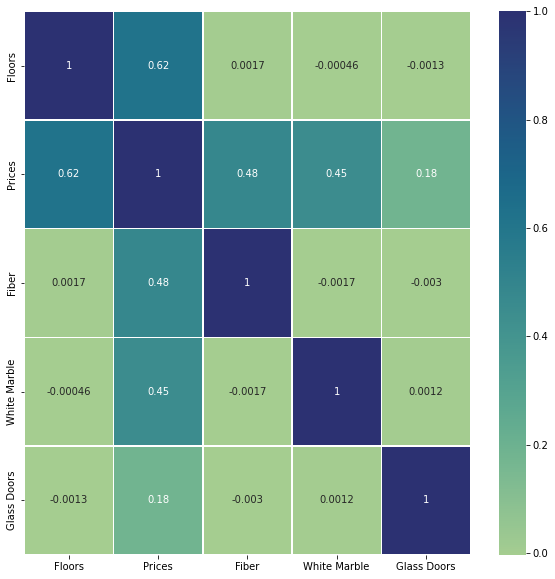

In [ ]:
#training prediction heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(solution_top_rf_train.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()
#shows the features that affect price 

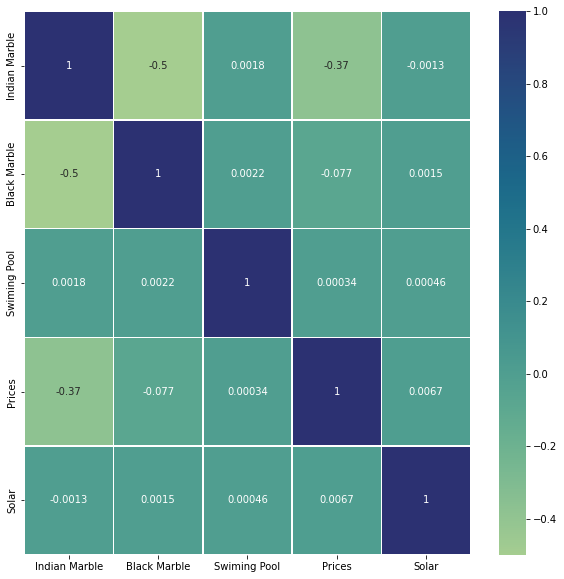

In [ ]:
#training prediction heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(solution_low_rf_test.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()
#shows the features that affect price 

##Top Features to increase price using Random Forest Regressor 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


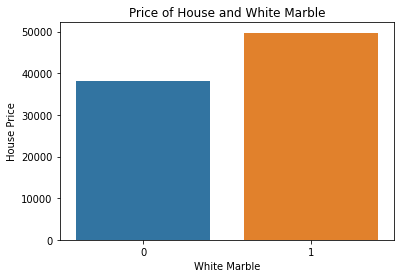

In [ ]:
yes_no = solution_top_rf_test.groupby(['White Marble']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and White Marble')
plt.ylabel('House Price')
plt.xlabel('White Marble');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


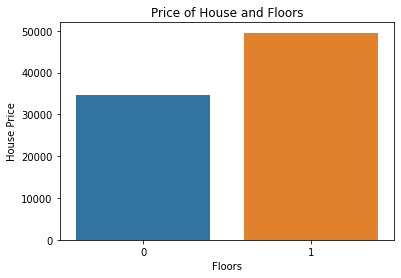

In [ ]:
yes_no = solution_top_rf_test.groupby(['Floors']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Floors')
plt.ylabel('House Price')
plt.xlabel('Floors');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


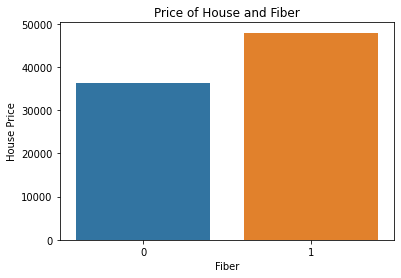

In [ ]:
yes_no = solution_top_rf_test.groupby(['Fiber']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Fiber')
plt.ylabel('House Price')
plt.xlabel('Fiber');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


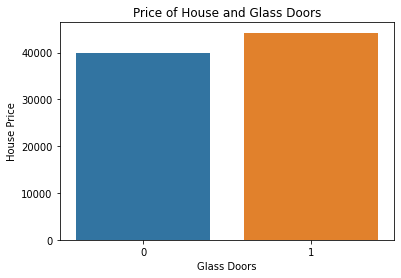

In [ ]:
yes_no = solution_top_rf_test.groupby(['Glass Doors']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Glass Doors')
plt.ylabel('House Price')
plt.xlabel('Glass Doors');

## Top features to decrese or no change price using Random Forest Regressor 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


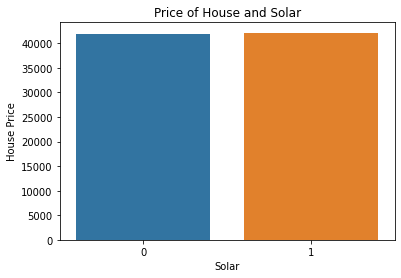

In [ ]:
yes_no = solution_low_rf_test.groupby(['Solar']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Solar')
plt.ylabel('House Price')
plt.xlabel('Solar');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


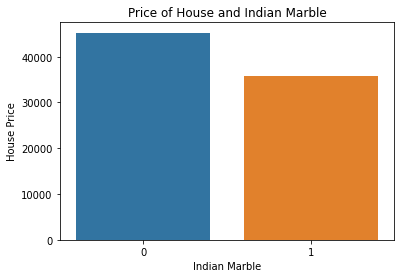

In [ ]:

yes_no = solution_low_rf_test.groupby(['Indian Marble']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Indian Marble')
plt.ylabel('House Price')
plt.xlabel('Indian Marble');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


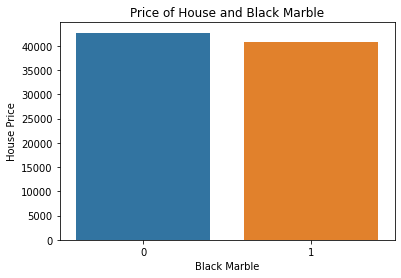

In [ ]:
yes_no = solution_low_rf_test.groupby(['Black Marble']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Black Marble')
plt.ylabel('House Price')
plt.xlabel('Black Marble');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


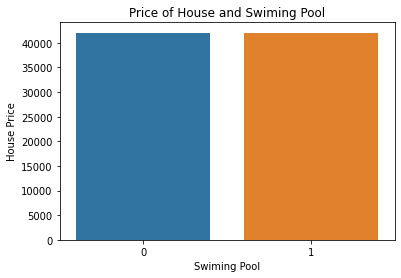

In [ ]:
yes_no = solution_low_rf_test.groupby(['Swiming Pool']).mean()
yes_no
sns.barplot(yes_no.index, yes_no['Prices'])
plt.xticks([0, 1])
plt.title('Price of House and Swiming Pool')
plt.ylabel('House Price')
plt.xlabel('Swiming Pool');